In [51]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
import copy as cp
sys.path.insert(0, '../model_tf2')
import parameters
import plotting_functions as pf
import data_utils as du
import model_utils as mu
import behaviour_analyses as ba

# ADD YOUR DIRECTORIES HERE

path = '/Users/ciprianbangu/Cogmaster/S3/Robotics/presentation/tf_tem/generalising-structural-knowledge/Summaries/'
save_dirs = [path]

# Choose which training run data to load
date = '2025-01-04'
run = '0'
index_load = None

# Try to find the most recent trained model data to run a forward pass
recent = -1
time_series_smoothing = 0
try:
    # Find model path and iteration index
    save_dir, index = pf.get_model_path(run, date, save_dirs, recent)
    # Run forward path for retrieved model, if folder doesn't exist yet
    model = ba.save_trained_outputs(date, run, int(index), base_path=save_dir, force_overwrite=False, n_envs_save=16)
except FileNotFoundError:
    print('No trained model weights found for ' + date + ', run ' + run + '.')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files in model directory: ['tem_0.weights.h5', 'tem_0.keras']
.h5 files found: ['tem_0.weights.h5']
1/27 2/27 3/27 4/27 5/27 6/27 7/27 8/27 9/27 10/27 11/27 12/27 13/27 14/27 15/27 16/27 17/27 18/27 19/27 20/27 21/27 22/27 23/27 24/27 25/27 26/27 27/27 

In [60]:
# Load data, generated either during training or in a forward pass through a trained model
data, para, list_of_files, save_path, env_dict = pf.get_data(save_dirs, run, date, recent, index=index, smoothing=time_series_smoothing, n_envs_save=16)

# Unpack data
x_all = data.x
g_all = data.g
p_all = data.p
acc_s_t_to = data.acc_to
acc_s_t_from = data.acc_from
positions = data.positions
adj = data.adj
x_timeseries = data.x_timeseries
x_gt_timeseries = data.x_gt_timeseries
p_timeseries = data.p_timeseries
g_timeseries = data.g_timeseries
pos_timeseries = data.pos_timeseries
final_variables = data.final_variables
# Group timeseries together for backward compatibility
timeseries = (g_timeseries, p_timeseries, pos_timeseries)
# Assign parameters
params, widths, n_states = para

# Specify plotting parameters. Some fields will be added after loading data & parameters
plot_specs = mu.DotDict({'smoothing': 0, # spatial ratemap smoothing. Needs to be odd, or 0 for no smoothing
                      'maxmin': True,
                      'cmap': 'jet',
                      'show': True,
                      'circle': True,
                      'g_max_0': False,
                      'p_max_0': True,
                      'save': False,
                      'split_freqs': True,
                      'mult': 4,
                      'cell_num': True,
                      'rectangle': {'marker_size': 20,
                                  'marker_shape': 's'},
                      'hexagonal': {'marker_size': 150,
                                  'marker_shape': 'H'},
                      'family_tree': {'marker_size': 20,
                                  'marker_shape': 'h'},
                      'line_ti': {'marker_size': 20,
                                  'marker_shape': 's'},
                      'wood2000': {'marker_size': 150,
                                  'marker_shape': 's',
                                  'plot_all': False,},
                      'frank2000': {'marker_size': 150,
                                  'marker_shape': 's',
                                  'plot_all': False,},
                      'grieves2016': {'marker_size': 50,
                                  'marker_shape': 'H',
                                  'plot_all': False,},
                      'sun2020': {'marker_size': 50,
                                  'marker_shape': 's'},
                      'nieh2021': {'marker_size': 50,
                                  'marker_shape': 's',
                                  'plot_all': False,
                                  'smooth': True,
                                  'surface': True,},
                     })

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

masks, g_lim, p_lim = pf.sort_data(g_all, p_all, widths, plot_specs)

yes /Users/ciprianbangu/Cogmaster/S3/Robotics/presentation/tf_tem/generalising-structural-knowledge/Summaries/2025-01-04/run0/save
Loading model time point 0
Successfully reconstructed run setup data from test_dict
Successfully loaded timeseries
Successfully reconstructed rate maps from timeseries


In [61]:
masks = [(np.sum(g,1) + np.sum(p,1) != 0).tolist() for g,p in zip(g_all, p_all)]
trainalbe_variables = model.trainable_weights

In [62]:
for env in range(params.n_envs_save):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * n_states[env]
    print(env, '  Num_states : ', n_states[env], '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=0))

0   Num_states :  52    Approx proportion :  [0.051]    Approx num :  [3.]
1   Num_states :  52    Approx proportion :  [0.048]    Approx num :  [3.]
2   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
3   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
4   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
5   Num_states :  52    Approx proportion :  [0.063]    Approx num :  [3.]
6   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
7   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
8   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
9   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
10   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
11   Num_states :  52    Approx proportion :  [0.092]    Approx num :  [5.]
12   Num_states :  52    Approx proportion :  [0.]    Approx num :  [0.]
13   Num_states :  52    Approx proportion :  [0.

In [55]:
env0 = 2
env1 = 3
envs = [env0, env1]

## GRAPHS

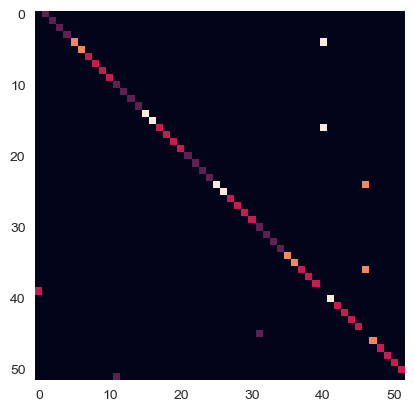

In [63]:
env_ = env_dict.curric_env.envs[0]
env_.world()
# plot different transitions in different colours
for i in range(env_.adj.shape[0]):
    for j in range(env_.adj.shape[1]):
        if env_.adj[i,j] != 0:
            ri, rt = env_.relation(i,j)
            env_.adj[i,j] = ri + 1
plt.imshow(env_.adj)
w,v = np.linalg.eig(env_.adj)

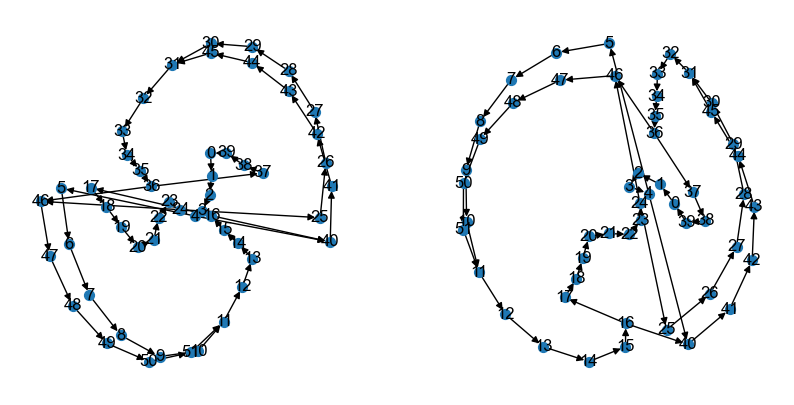

In [74]:
import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = pf.remove_zero_adj(adj[env])
        
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_array(adj_,create_using=nx.DiGraph)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

## AGENT COVERAGE

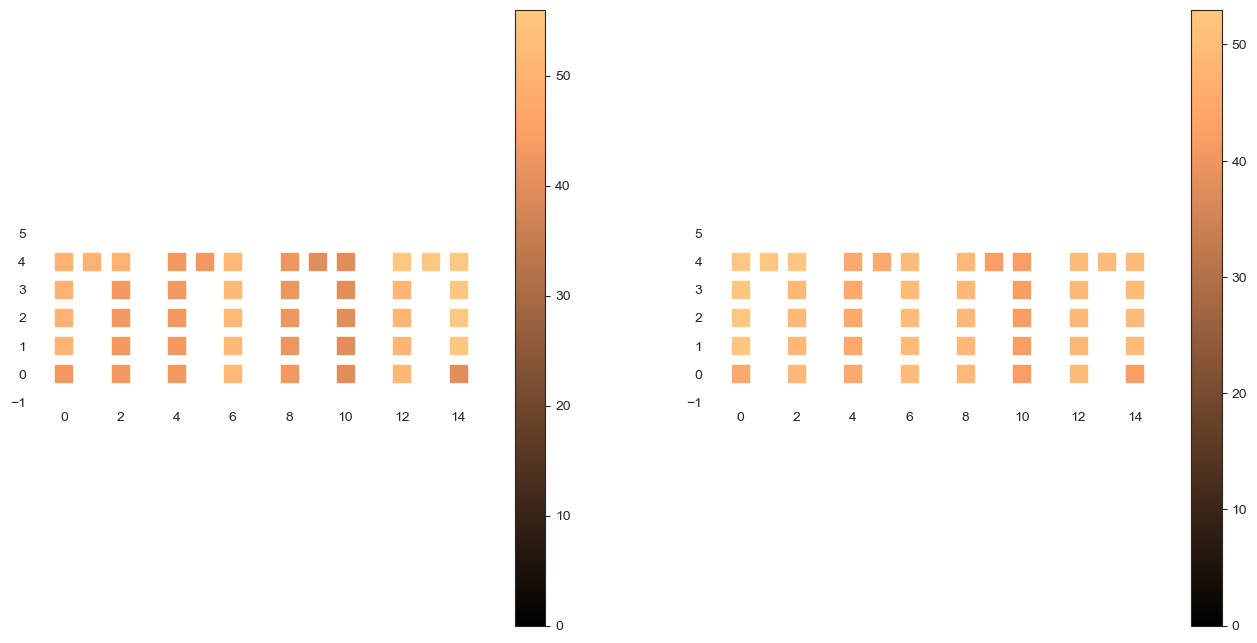

[0.00345679] [0.00395062]


In [76]:
plot_specs.cmap = 'copper'

try:
    s = plot_specs[parameters.old2new(params.world_type)].marker_size
    marker = plot_specs[parameters.old2new(params.world_type)].marker_shape
except:
    print('exception')
    s, marker = 10, 'H'
#xs, ys = get_node_positions(env, params, plot_specs=plot_specs)
figsize = (16,8)

plt.figure(figsize=figsize) 
for i, env in enumerate([env0, env1]):
    plt.subplot(1,2,i+1)
    pos, bins = np.histogram(pos_timeseries[env], bins=np.arange(n_states[env]+1))
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=pos, _plot_specs=plot_specs)
    plt.scatter(xs, ys, c=cell_prepared, s=s, marker=marker, vmin=0, cmap=plot_specs.cmap)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()

plt.show()

print(min(positions[env0]), min(positions[env1]))

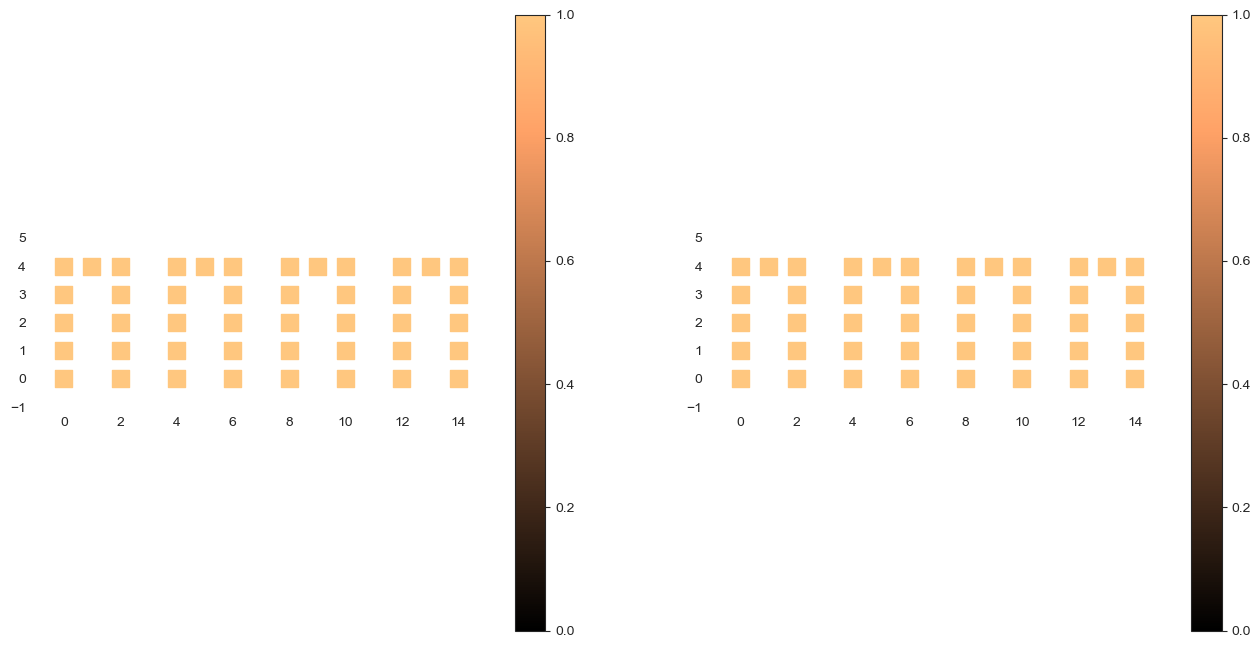

In [77]:
# where the agent didnt go much shown in black
figsize= (8 * len(envs), 8)

plt.figure(figsize=figsize)

for i, env in enumerate([env0, env1]):
    pos, bins = np.histogram(pos_timeseries[env], bins=np.arange(n_states[env]+1))
    a = pos > 5
    plt.subplot(1,2,i+1)
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=a.astype(float), _plot_specs=plot_specs)
    plt.scatter(xs, ys, c=cell_prepared, s=s, marker=marker, vmin=0, cmap=plot_specs.cmap)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()    
    
plt.show()

## ACCURACY MAPS

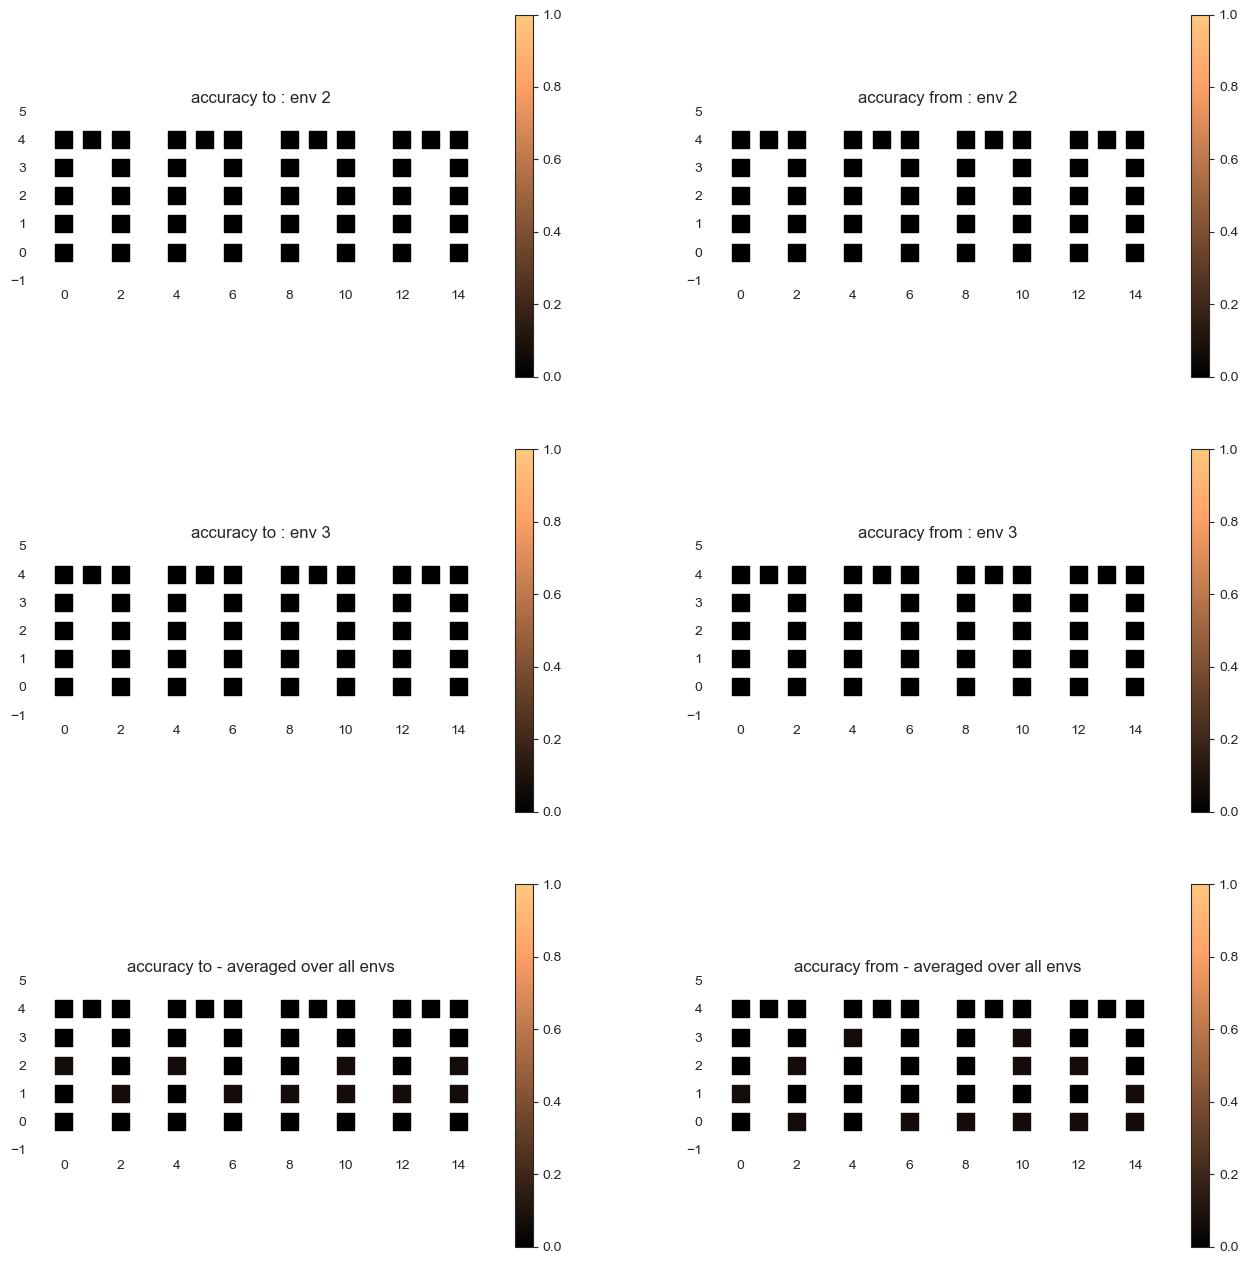

In [67]:
figsize= (8 * len(envs), 16)

plt.figure(figsize=figsize)        
for i, env in enumerate([env0, env1]):
    plt.subplot(3,2,2*i+1)    
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=acc_s_t_to[env], _plot_specs=plot_specs)
    plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
    plt.title('accuracy to : env ' + str(env))
    
    plt.subplot(3,2,2*i+2)
    xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=acc_s_t_from[env], _plot_specs=plot_specs)
    plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
    plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
    plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
    plt.title('accuracy from : env ' + str(env))
    
    

# average across envs - should do this properly with position counts
env = 0
# find other envs of same size
accs_to = [acc_to for i, acc_to in enumerate(acc_s_t_to) if n_states[i] == n_states[env]]
accs_from = [acc_from for i, acc_from in enumerate(acc_s_t_from) if n_states[i] == n_states[env]]

plt.subplot(3,2,5)
xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=np.mean(accs_to, axis=0), _plot_specs=plot_specs)
plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.title('accuracy to - averaged over all envs')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(3,2,6)
xs, ys, cell_prepared = env_dict.curric_env.envs[env].get_node_positions(cells=np.mean(accs_from, axis=0), _plot_specs=plot_specs)
plt.scatter(xs, ys, c=cell_prepared, cmap=plot_specs.cmap, s=s, marker=marker, vmin=0, vmax=1)
plt.xlim(xmin=min(xs)-1, xmax=max(xs)+1)
plt.ylim(ymin=min(ys)-1, ymax=max(ys)+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.title('accuracy from - averaged over all envs')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## ENTORHINAL CELLS

In [68]:
plot_specs.split_freqs = True
plot_specs.n_cells_freq = params.n_grids_all
plot_specs.cmap = 'jet'
plot_specs.node_plot = True
plot_specs.max_min = False

In [69]:
pf.square_plot(g_all, env0, params, plot_specs, name='g0', lims=g_lim, mask=masks[env0], env_class=env_dict.curric_env.envs[env0])

ValueError: Number of rows must be a positive integer, not 17.0

<Figure size 1800x1800 with 0 Axes>

In [70]:
pf.square_plot(g_all, env1, params, plot_specs, name='g1', lims=g_lim, mask=masks[env1], env_class=env_dict.curric_env.envs[env1])

ValueError: Number of rows must be a positive integer, not 17.0

<Figure size 1800x1800 with 0 Axes>